In [1]:

def func1(input: str) -> str:
    return input + " from first function"

def func2(input: str) -> str:
    return input + " from second function"

In [3]:
print(func1("Bapan"))
print(func2("Bairagya"))

Bapan from first function
Bairagya from second function


In [4]:
from langgraph.graph import Graph

In [5]:
workflow = Graph()
workflow

In [6]:
workflow.add_node("func1", func1)
workflow.add_node("func2", func2)

In [7]:
workflow.add_edge("func1", "func2")

In [8]:
workflow.set_entry_point("func1")
workflow.set_finish_point("func2")

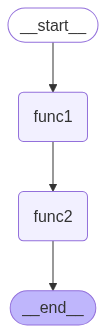

In [9]:
app = workflow.compile()
app

In [10]:
app.get_graph()

Graph(nodes={'func1': Node(id='func1', name='func1', data=func1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'func2': Node(id='func2', name='func2', data=func2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='func1', data=None, conditional=False), Edge(source='func1', target='func2', data=None, conditional=False), Edge(source='func2', target='__end__', data=None, conditional=False)])

Graph(nodes={'func1': Node(id='func1', name='func1', data=func1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'func2': Node(id='func2', name='func2', data=func2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='func1', data=None, conditional=False), Edge(source='func1', target='func2', data=None, conditional=False), Edge(source='func2', target='__end__', data=None, conditional=False)])


In [11]:
from IPython.display import Image, display

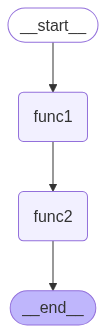

In [12]:
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
app.invoke("Hi, this is Bapan")

'Hi, this is Bapan from first function from second function'

In [16]:
for output in app.stream("hi this is rohit"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from func1
_______
hi this is rohit from first function


here is output from func2
_______
hi this is rohit from first function from second function




##### **LLM Response Workflow:**

In [14]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")

In [15]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [18]:

def llm(input: str) -> str:
    llm = ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    return llm.invoke(input).content


def get_token_count(input: str) -> str:
    tokens = len(input.split(" "))
    return f"Total number of tokens generated are {tokens}"

In [19]:
workflow1 = Graph()

workflow1.add_node('llm_response', llm)
workflow1.add_node('token_generator', get_token_count)

workflow1.add_edge('llm_response', 'token_generator')

workflow1.set_entry_point('llm_response')
workflow1.set_finish_point('token_generator')

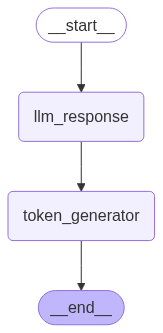

In [20]:
app1 = workflow1.compile()
app1

In [21]:
app1.get_graph()

Graph(nodes={'llm_response': Node(id='llm_response', name='llm_response', data=llm_response(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'token_generator': Node(id='token_generator', name='token_generator', data=token_generator(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_response', data=None, conditional=False), Edge(source='llm_response', target='token_generator', data=None, conditional=False), Edge(source='token_generator', target='__end__', data=None, conditional=False)])

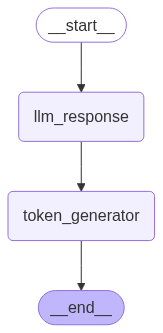

In [22]:
display(Image(app1.get_graph().draw_mermaid_png()))

In [23]:
app1.invoke("Tell me something about Agentic AI")

'Total number of tokens generated are 304'

In [24]:
for output in app1.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm_response
_______
Tata Enterprises, more accurately referred to as the **Tata Group**, is a massive Indian multinational conglomerate headquartered in Mumbai.  It's not a single entity but a network of over 100 operating companies, employing millions globally and spanning diverse sectors.  Understanding its complexity requires examining its structure, history, key businesses, and philosophy.

**I. History and Structure:**

* **Origins:** Founded in 1868 by Jamsetji Tata, a Parsi entrepreneur, the group initially focused on trading and textiles.  Jamsetji had a visionary approach, prioritizing ethical conduct and long-term sustainability over immediate profits. This ethos remains a core part of the Tata Group's identity.
* **Growth and Diversification:** The group's growth has been organic and through acquisitions.  Over the decades, it expanded into steel (Tata Steel), automobiles (Tata Motors), hospitality (Taj Hotels), technology (Tata Consultancy Services – TC